# Option introduction and pricing

# 国内目前场外期权市场概述

场外期权(Over-the-Counter options,一般简称为OTC options)，是指在非集中性的交易场所进行交易的非标准化的期权合约，它是相对于交易所场内期权而言的。
## 市场结构和规模，参与主体
- 市场结构
场外期权的交易对手方主要有三类：交易商、其他金融机构和非金融机构，其中交易商要求具备更高的资金实力和信用水平，除了担任中介机构的角色外，还要能够以自有资金交易场外期权，承担交易和对冲的风险。早期场外期权主要以撮合交易模式为主，交易商占比较少，低于其他金融机构占比，但随着场外期权市场的快速发展壮大，做市模式越来越成熟，交易商占比超过50%。

![market_structure](./graphs/market_structure.jpg)

- 规模
关于场外商品期权，目前我国仅有少数几家期货公司进行了相应产品的部署与尝试。受标的商品市场化程度、市场对场外商品期权认知程度以及场外商品期权定价、风险控制、规则制度制定等多方面因素的影响，我国商品期权发展还处于起步阶段。

预计2018年国内场外期权的规模在*3000亿元*左右。

- 参与主体
场外期权服务的供给方, 参与对冲的基金，企业。

## 场外期权的作用
场内期权合约以标准化形式存在，可以满足普通群体的需求。

*场外期权合约形式非标准化*，最大的特点是可以个性化设计，即针对个体的特殊需求来量身打造期权产品。

### 市场角度

- 完善市场结构，提高市场活跃度

场外期权的推行丰富了市场的产品结构，满足市场各类投资者的多样化需求，场外期权的交易特点与场内期权类似，但是场内期权会受到标的物、期限的制约而影响其与现有产品的结合。场外期权可以实现与其他产品的结合，从而改善理财产品的收益特征，形成产品之间协同发展的格局。例如在保本型理财产品中，期权的保险作用可以在原有的条件下，降低产品在固定收益资产权重的限制，释放更多的空间给高收益的权益类资产，从而提高产品的收益率，场外期权的一个重要应用就是结构化产品。

- 优化资产配置，提高标的成交量

期权的非线性损益特征使其可以构造出多种组合，因此场外期权的应用产生了更加丰富的投资策略，从而有助于优化资产配置，降低投资组合的波动性。部分场外期权采用实物交割，因此会加大对标的物的需求，从而对标的价格产生积极的刺激作用，提升交易量。

### 参与者角度

- 拓展发行方的盈利模式，增加利润来源

场外期权的发行方可以根据客户对风险、收益的偏好程度，设计出“私人订制”的场外期权产品，拓展公司的盈利模式，摆脱传统业务对于市场行情等因素的依赖，提高自身服务水平、定价和做市能力，增加利润来源。

- 满足投资者多样化需求，降低投资成本

## 场外期权与场内期权的关系
场内期权与场外期权的区别最主要就表现在期权合约是否标准化。

场内期权基本上与交易所内进行的期权交易无异。两者不同之处主要在于场外期权合约的条款没有任何限制或规范，例如行使价及到期日，均可由交易双方自由厘订，而交易所内的期权合约则是以标准化的条款来交易。
场外期权市场的参与者可以因各自独特的需要，量身订做一份期权合约和拟定价格，然后通过场外期权经纪人寻找交易。交易所辖下的场内期权，均是通过交易所进行交易、清算，而且有严格的监管及规范，所以不透明化。例如成交价、成交量、未平仓合约数量等数据。

至于场外期权，基本上可以说是单对单的交易，当中所涉及的只有买方、卖方及经纪共三个参与者，或仅是买卖双方，并没有一个中央交易平台。故此，场外期权市场的透明度较低，只有积极参与当中活动的行内人（例如投资银行及机构投资者）才能较清楚市场行情，一般散户投资者难以得知场外期权的交易情况，比如期权的成交价以及引伸波幅水平等。

在商品期权上市前，机构主要是通过场外期权进入到场内进行风险对冲的。在商品期权推出后，场内期权定价也逐渐透明化，为投资者也可以在场外期权交易中来进行参考了。

在商品期权上市之前，场外期权定价一般都是在场内定价的向上浮动十个点左右，而商品期权上市后，场外期权就能浮动一到三个点。

场外期权在为投资者和机构提供风险对冲渠道的同时，也保证期权交易市场做到公平、公开、公正的基本原则，保证投资者和机构能在购买或者出售期权时的公平性。这点也是为了促进场外期权交易市场进行的模范化，这样才能让场外期权规模更进一步发展。


# 国内目前大宗商品场内期权市场概述
## 做市商参与主体
做市商通常在国际上为自营交易公司、投资银行自营交易部以及对冲基金。目前国内上市的三个期权的做市商多数是证券、期货公司自营资金来做市。

## 软件系统：
- 快期
本人曾参与快期CTP应用在商品期货上的统计套利交易系统的开发合作。

- AlgoStars

## 做市策略
### 做市商盈利模式
做市商的主要利润来自于双向报价的买卖价差。因而，做市商需要计算期权的理论价格，在大量买入和卖出交易中，逐渐积累每笔交易价格和理论价格的差价，并根据持仓头寸特征，动态调整价差。由于做市商以被动成交为主，因而在一些对手方持续大量单边交易的情况下，做市商可能面临损失。

做市商的盈利模式不限于赚取买卖价差，他们还可以通过套利交易来赚钱。例如期权套利者利用不同合约定价上的差异，做多低估合约卖空高估合约从而盈利。另外，做市商也可以通过交易所返佣来增加收入，这对于充分竞争的美国市场上的做市商而言甚至是一个重要的收入来源，因为其期权价差已经如此微小以至于难以带来理想的收益了。交易所返佣的经典案例是纽约证券交易所，纽交所对“市场流动性提供者”返还佣金，鼓励他们频繁交易，从而保证市场流动性。
### 理论价格的确定
在向市场进行报价前，做市商需要确定自己的“底牌”，也即是期权合约的理论价格。然后，根据市场风险、当前存货和目标库存、安全边际等设置一定的价差，得到买卖报价（当然，做市商的报价也可能是采用波动率进行的）。最后根据头寸情况和市场情况，及时调整报价策略，并进行对冲和风险管理。

期权交易的核心是对波动率的计算和交易。在期权做市系统中，对期权合约理论价格的调整，主要也是通过对期权隐含波动率的调整来完成的。因此，做市商首先需要确定期权合理的隐含波动率。

根据得到的各个合约的隐含波动率后，做市商就可以拟合波动率曲面了。

得到合理的隐含波动率后，通过期权定价模型即可以得到期权理论价格。目前业界主流的期权定价模型包括Black-Scholes模型、二叉树模型、Monte-Carlo 模拟定价模型等。

期权的理论价格是做市商的报价中枢。做市商在引导市场价格向理论价格靠近的同时，利用delta中性对冲期望实现盈利。
### 报价价差确定
在确定了期权的理论价格后，通过设定报价价差，做市商就可以得到向市场报出的买卖价格了。关于报价价差，学术界主要使用存货模型和信息模型进行解释。而在实际操作中，报价价差的影响因素是非常多的。
- 存货模型和信息模型。
报价价差是做市商的收入，至少应当覆盖做市商的成本。期权做市成本主要包括三个方面：订单处理成本、存货成本和信息成本。

#### 做市商买卖价差影响因素
- 期权交易量
- 标的资产价差和波动性
- 期权品种价格
- 市场竞争压力
- 库存状况

### 套利策略
![arbitrage](./graphs/arbitrage.png)
#### 无风险绝对套利
通过几种期权的组合的方式，发现定价中的套利空间实现无风险套利。
#### 统计套利
- 波动率交易，建立于对历史波动率和隐含波动率的比较。当期权价格对应的波动率过高或者过低时，可以通过动态delta对冲策略与之进行套利操作。
##### 网格交易法
在2011年Association for Computing Machinery大会上，Chakraborty对在均值回归这种特殊市场行情中的做市商做了详尽分析，他认为市场价格可以分为三种走势：第一，均值回归（Mean Reverting: Ornstein-Uhlenbeck、Schwartz过程）；第二，随机游走（Brownian Motion）；第三，趋势行情（Directional Drift）。

在均值回归的行情中，如果市场价格走势有向某一价格回归的趋势，做市商的网格算法交易可以获得稳定的正收益。盈利额为(K-z^2)/2，K为价格的路径，z为价格的位移。对于满足Ornstein-Ulenbeck过程的情况下，盈利更高更稳定。在外汇、期权等市场，网格交易都有极其广泛的运用，其主要风险来源于非均值回归的行情。

##### SOBI策略
SOBI（static order book imbalance，静态非平衡订单簿）旨在通过对买卖盘的分布来预测价格走势，其并不一定是一种持续双向报价的做市商系统，但可以作为辅助做市商策略。

在SOBI策略中，有开仓阀值、成交量加权权重、市价单与限价单的选择、下单数量与Theta比例等一系列参数需要优化。研究发现，该策略具有统计意义上长期稳定的盈利性。另一个派生的策略为通过实时波动率来调整SOBI策略参数，也取得正收益。

##### 绝对价格做市
在贝叶斯统计的框架下，做市商在开盘前对期权价格进行预估，得到估计值,在开盘后，随着订单更新价格，做市商更新价格。这个过程可以通过Kalman滤波算法来实现。



# Asian option pricing


An Asian option is an option type where the payoff depends on the average price of the underlying asset over a certain period of time as opposed to standard options (American and European) where the payoff depends on the price of the underlying asset at a specific point in time (maturity). 

call option price = max(A(0, T) - K, 0)

put option price = max(K - A(0, T) , 0)

A(0,T)=exp(1/N∑i=1/Nlog(S(ti)))

#### Option pricing & greeks:
Maturation: 90 days.

Type: Asian option

Price: 17000 yuan/ton

Strike Price: 16000 yuan/ton

Volatility: 20%

Interest rate: 1%.

### method overview
- generate random numbers
- sample from the distribution of the stock prices
- compute discounted Asian option payoffs.
- obtain an estimate of the option price by averaging across replications.

In [22]:
import matplotlib.pyplot as plt

In [13]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import scipy as sp
import numpy as np
s0 = 17000  # today stock price
x = 16000  # exercise price
T = 0.25  # maturity in years
r = 0.01  # risk-free rate
sigma = 0.2  # volatility (annualized)
n_simulation = 10000  # number of simulations
n_steps = 90
dt = T / n_steps
def asian_option_pricing(s0, x, T, r, sigma):
    put = sp.zeros([n_simulation], dtype=float)
    for j in range(0, n_simulation):
        sT = s0
        total = 0
        for i in range(0, int(n_steps)):
            e = sp.random.normal()
            sT *= sp.exp((r - 0.5 * sigma * sigma) * dt + sigma * e
                         * sp.sqrt(dt))
            total += sT
        price_average = total / n_steps
        put[j] = max(x - price_average, 0)
    put_price = sp.mean(put) * sp.exp(-r * T)
    return put_price
put_price = asian_option_pricing(s0, x, T, r, sigma)
print ('put price = ', round(put_price, 3))

put price =  64.392


### option greeks

Estimators of Sensitivities of an Asian Option:
Numerical Analysis
http://www.m-hikari.com/ijma/ijma-2014/ijma-17-20-2014/moussiIJMA17-20-2014.pdf

In [14]:
def enum(**enums):
    return type('Enum', (), enums)
option_measure = enum(VALUE='value', DELTA='delta', THETA='theta', RHO='rho', VEGA='vega', GAMMA='gamma')

In [15]:
n_simulation**(-0.25) #The rate convergence of MC methods is typically N^−1/4

0.1

####  delta: calculate put price sensitivity to stock price.

In [16]:

stock_price = np.linspace(15000, 18000, 1/n_simulation**(-0.25))
put_price_delta = np.zeros(len(stock_price))
for i, value in enumerate(stock_price):
    if i % 10 == 0:
        print(i)
    put_price_delta[i] = asian_option_pricing(value, x, T, r, sigma)

0


/home/weiwu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


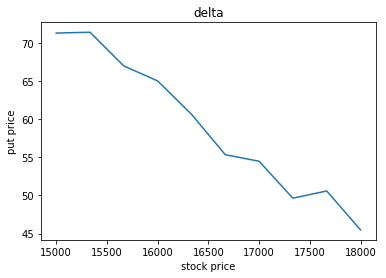

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('delta')

ax.set_xlabel('stock price')
ax.set_ylabel('put price')
ax.plot(stock_price, put_price_rho)
plt.show()


####  rho: calculate put price sensitivity to interest rate.

In [17]:
# calculate rho.
interest_rates = np.linspace(0, 0.1, 1/n_simulation**(-0.25))
put_price_rho = np.zeros(len(interest_rates))
for i, value in enumerate(interest_rates):
    if i % 10 == 0:
        print(i)
    put_price_rho[i] = asian_option_pricing(s0, x, T, value, sigma)

/home/weiwu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


0


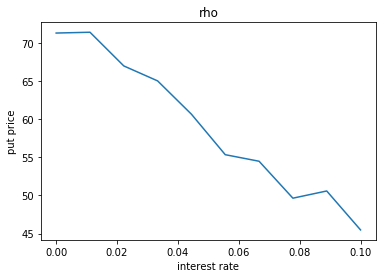

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('rho')

ax.set_xlabel('interest rate')
ax.set_ylabel('put price')
ax.plot(interest_rates, put_price_rho)
plt.show()


####  vega: calculate put price sensitivity to volatility.

In [43]:
# calculate rho.
volatilities = np.linspace(0, 0.3, 1/n_simulation**(-0.25))
put_price_vega = np.zeros(len(volatilities))
for i, value in enumerate(volatilities):
    # counter
    print(i) 
    put_price_vega[i] = asian_option_pricing(s0, x, T, r, sigma=value)

/home/weiwu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


0
1
2
3
4
5
6
7
8
9


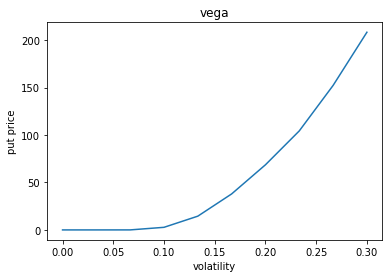

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('vega')

ax.set_xlabel('volatility')
ax.set_ylabel('put price')
ax.plot(volatilities, put_price_vega)
plt.show()
